In [1]:
import sys
sys.path.append('/public/src')
from factor_evaluation_server import FactorEvaluation,DataService # type: ignore
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import pandas_ta as ta

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

# 定义因子！

In [279]:
@staticmethod

def RSV_volume_volatility(df, window=18):
    """
    计算成交量加权RSV因子，考虑价格波动率
    """
    
    # 计算典型价格（POC点）
    typical_price = (df['high'] + df['low'] + df['close']) / 3
    
    # 计算成交量加权价格区间
    vwap_low = (df['low'] * df['volume']).rolling(window).sum() / df['volume'].rolling(window).sum()
    vwap_high = (df['high'] * df['volume']).rolling(window).sum() / df['volume'].rolling(window).sum()
    
    # 计算成交量加权RSV
    denominator = vwap_high - vwap_low + 1e-12
    
    std_5 = df['close'].rolling(5).std()
    std_30 = df['close'].rolling(30).std()
    price_fluctuation = std_5 / std_30
    
    factor = (typical_price - vwap_low) / (denominator * price_fluctuation)
    
    # # 把因子值超过正负6的都赋值为0
    # factor[abs(factor) > 6] = 0

    return factor

# 测试因子表现


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): 0.011864
   Rank_IC (Spearman): -0.022932
📊 信息比率:
   IR: 0.461216
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 128916
   因子列: RSV_volume_volatility
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


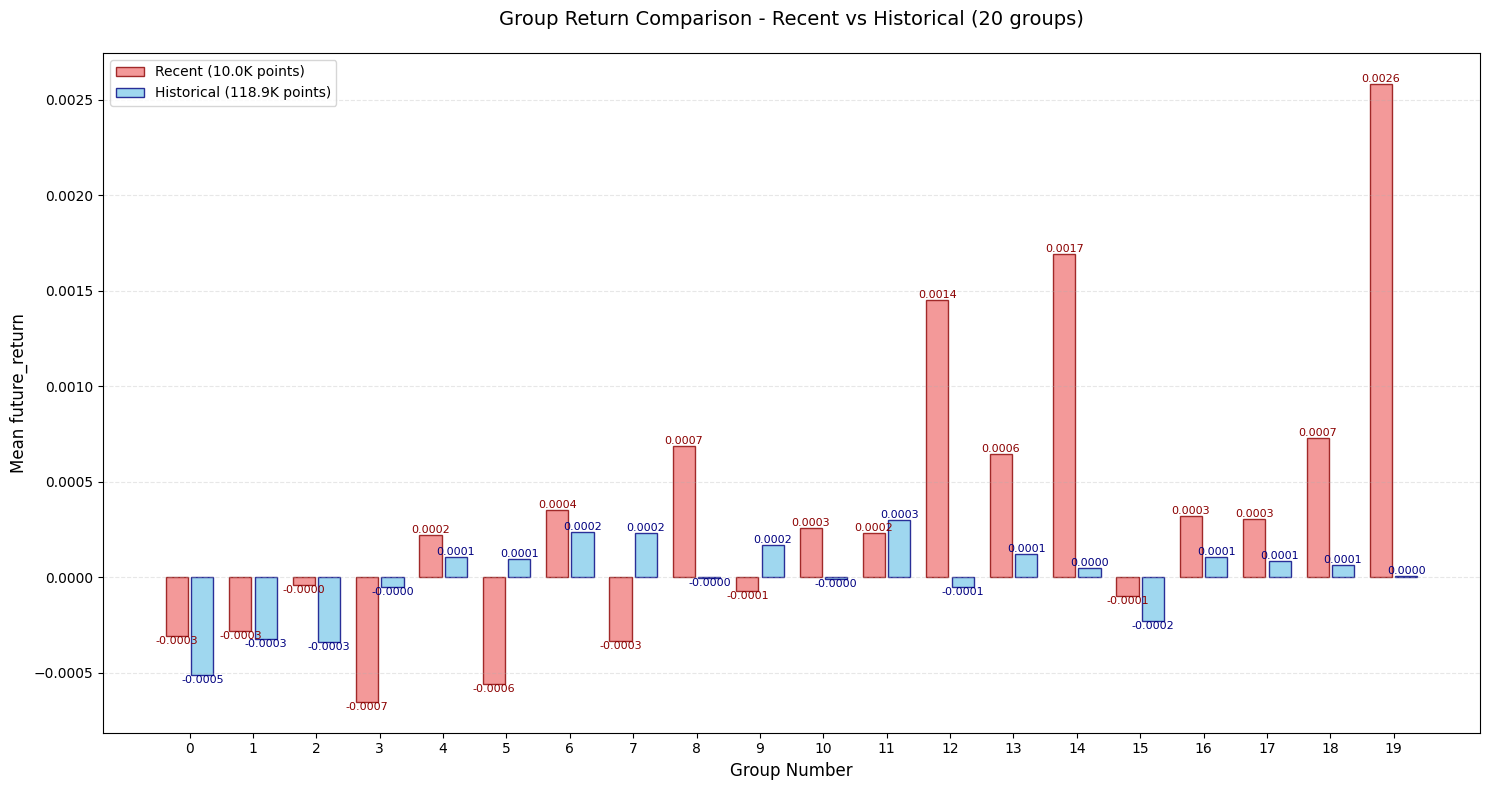

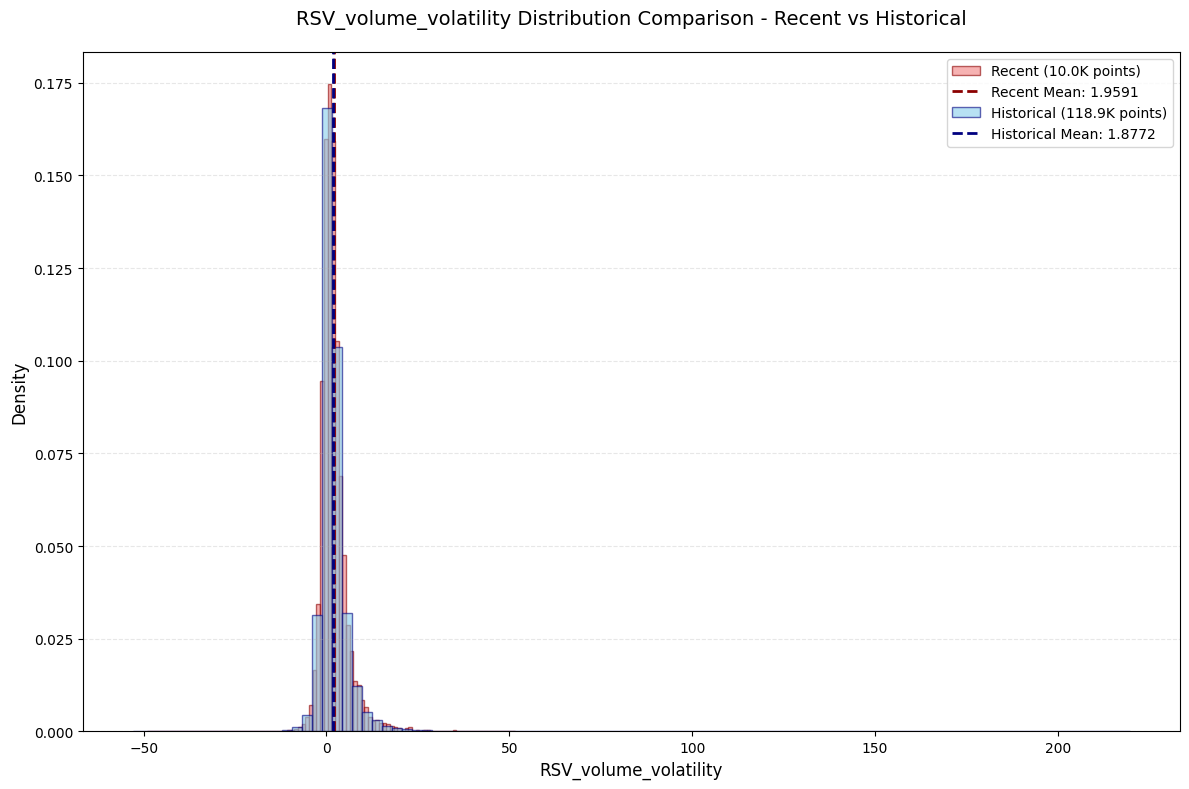

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [280]:
evaluator.set_factor(
    factor_func=RSV_volume_volatility,
    factor_name='RSV_volume_volatility'
)

result=evaluator.run_full_evaluation(run_stationarity_test=False)

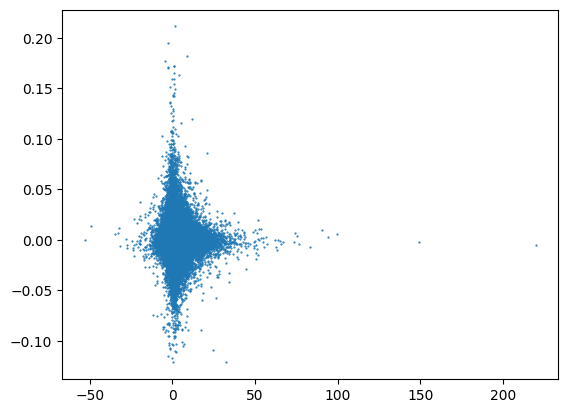

In [281]:
import matplotlib.pyplot as plt
plt.scatter(RSV_volume_volatility(df),df['close'].pct_change(-10), s=0.3)

In [282]:
result['information_ratio']['group_correlations']
# 这表示不同分组之间的相关性，通常用于评估因子在不同市场状态下的表现一致性。
# 如果相关性较高，说明因子在不同市场状态下表现一致；如果相关性较低，说明因子在不同市场状态下表现差异较大。

[0.005220889383304166,
 0.007616477024531825,
 -0.008015544476333862,
 0.003732942438397464,
 0.005161448069847638,
 0.010231436036377058,
 0.002951759681665103,
 -0.011381451777490885,
 0.002729222106146708,
 0.02577938058305678]

In [283]:
print(result)

{'correlation_analysis': {'IC': 0.01186440450848234, 'Rank_IC': -0.022931675779041722}, 'information_ratio': {'IR': 0.4612155140939259, 'group_correlations': [0.005220889383304166, 0.007616477024531825, -0.008015544476333862, 0.003732942438397464, 0.005161448069847638, 0.010231436036377058, 0.002951759681665103, -0.011381451777490885, 0.002729222106146708, 0.02577938058305678], 'n_groups': 10}, 'group_analysis': {'group_stats':        val_min  val_max  val_mean  return_mean  return_std  count
group                                                            
0     -53.0132  -2.1004   -4.0053      -0.0005      0.0147   6446
1      -2.1003  -1.2236   -1.6011      -0.0003      0.0133   6446
2      -1.2235  -0.7605   -0.9735      -0.0003      0.0123   6446
3      -0.7605  -0.4238   -0.5851      -0.0001      0.0117   6446
4      -0.4238  -0.1365   -0.2786       0.0001      0.0117   6445
5      -0.1364   0.1459    0.0030       0.0000      0.0118   6446
6       0.1459   0.4380    0.2930       